In [1]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

# Read the City and Ride Data
#print(city_data.head())
#print(ride_data.head())


# Combine the data into a single dataset
city_ride = pd.merge(city_data, ride_data, on='city', how='outer')
# Display the data table for preview
city_ride.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

#       * Urban Data
rides_urban = city_ride.loc[city_ride['type'] == 'Urban']
urban_rides = pd.DataFrame(rides_urban.groupby(['city','type'])['ride_id'].count())
urban_fare = pd.DataFrame(rides_urban.groupby(['city','type'])['fare'].median())
urban_drivers = pd.DataFrame(rides_urban.groupby(['city','type'])['driver_count'].sum())

#       * SubUrban Data
rides_suburban = city_ride.loc[city_ride['type'] == 'Suburban']
suburban_rides = pd.DataFrame(rides_suburban.groupby(['city','type'])['ride_id'].count())
suburban_fare = pd.DataFrame(rides_suburban.groupby(['city','type'])['fare'].median())
suburban_drivers = pd.DataFrame(rides_suburban.groupby(['city','type'])['driver_count'].sum())

#       * Rural Data
rides_Rural = city_ride.loc[city_ride['type'] == 'Rural']
Rural_rides = pd.DataFrame(rides_Rural.groupby(['city','type'])['ride_id'].count())
Rural_fare = pd.DataFrame(rides_Rural.groupby(['city','type'])['fare'].median())
Rural_drivers = pd.DataFrame(rides_Rural.groupby(['city','type'])['driver_count'].sum())

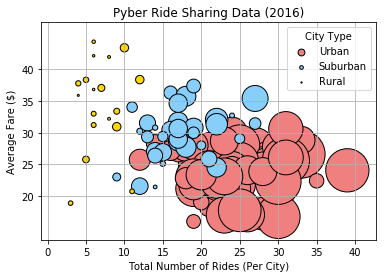

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
# Build the scatter plots for each city types
ax.scatter(urban_rides.ride_id, urban_fare.fare, s=urban_drivers, color='lightcoral', edgecolor='black', alpha=1,label='Urban')
ax.scatter(suburban_rides.ride_id, suburban_fare.fare, s=suburban_drivers, color='lightskyblue',edgecolor='black',alpha=1,label='Suburban')
ax.scatter(Rural_rides.ride_id, Rural_fare.fare, s=Rural_drivers, color='gold',edgecolor='black',alpha=1,label='Rural')
# Create a legend
ax.legend(title='City Type',markerscale=.2)
ax.grid()
# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

ax.yaxis.set(ticks=range(20,45,5))
ax.margins(x=0.1,y=0.1) 
# Show plot
plt.show()

In [4]:
# Incorporate a text label regarding circle size


# Save Figure
plt.savefig('Bubble_Plot_of_Ride_Sharing_Data.png')

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

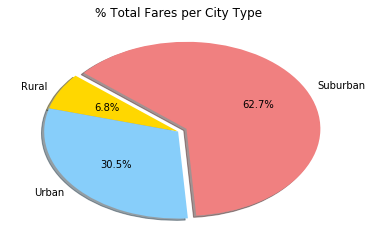

<Figure size 432x288 with 0 Axes>

In [5]:
# Calculate Type Percents
fare = pd.DataFrame(city_ride.groupby(['type'])['fare'].sum())
fare_percent = pd.DataFrame(fare['fare'] / fare['fare'].sum() * 100)

# Build Pie Chart
labels = ['Rural','Urban','Suburban']
colors=['gold','lightskyblue','lightcoral']
explode = [0,0,.07]
plt.pie(fare_percent,autopct="%1.1f%%",explode=explode,startangle=140,labels=labels,colors=colors,shadow=True)
plt.title("% Total Fares per City Type")

# Show Figure
plt.show()

# Save Figure
plt.savefig('Total_Fares_by_City_Type.png')

## Total Rides by City Type

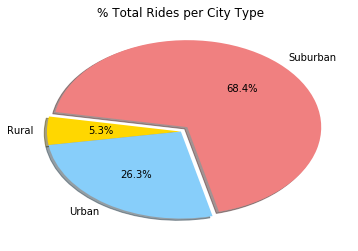

<Figure size 432x288 with 0 Axes>

In [6]:
# Calculate Ride Percents
rides = pd.DataFrame(city_ride.groupby(['type'])['ride_id'].count())
rides_percent = pd.DataFrame(rides['ride_id'] / rides['ride_id'].sum() * 100)

# Build Pie Charts
labels = ['Rural','Urban','Suburban']
colors=['gold','lightskyblue','lightcoral']
explode = [0,0,.07]
plt.pie(rides_percent,autopct="%1.1f%%",explode=explode,startangle=170,labels=labels,colors=colors,shadow=True)
plt.title("% Total Rides per City Type")

# Show Figure
plt.show()

# Save Figure
plt.savefig('Total_Rides_by_City_Type.png')

## Total Drivers by City Type

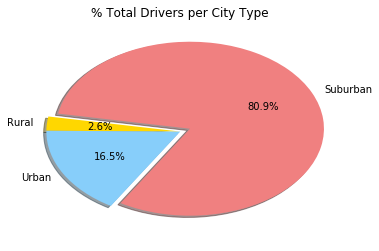

In [7]:
# Calculate Driver Percents
cities = city_ride.drop_duplicates('city')
drivers = pd.DataFrame(cities.groupby(['type'])['driver_count'].sum())
drivers_percent = pd.DataFrame(drivers['driver_count'] / drivers['driver_count'].sum() * 100)

# Build Pie Charts
labels = ['Rural','Urban','Suburban']
colors=['gold','lightskyblue','lightcoral']
explode = [0,0,.08]
plt.pie(drivers_percent,autopct="%1.1f%%",explode=explode,startangle=170,labels=labels,colors=colors,shadow=True)
plt.title("% Total Drivers per City Type")
# Show Figure
plt.plot()

# Save Figure
plt.savefig('Total_Drivers_by_City_Type.png')